In [1]:
# This file is part of Grafite <https://github.com/marcocosta97/grafite>.
# Copyright (C) 2023 Marco Costa.
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <https://www.gnu.org/licenses/>.

import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib
import matplotlib.pyplot as plt
import itertools, os
from pathlib import Path

/tmp/ipykernel_314616/3991720442.py:18: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
width = 7.16808
width_small = 3.50069
max_height = 9.77885

rc_fonts = {
    "font.family": "serif",
    "font.size": 9.5,
    "text.usetex": True,
    'text.latex.preamble': r'\usepackage{mathpazo}'}
matplotlib.rcParams.update(rc_fonts)

out_folder = Path('./figures')
if not out_folder.exists():
    out_folder.mkdir()
base_csv_path = Path('./results')
if not out_folder.exists():
    raise FileNotFoundError(
        "error, cannot find the results folder")

range_filters = ['memento', 'grafite', 'bucketing', 'snarf', 'surf', 'proteus', 'rosetta', 'rencoder', 'rencoder_ss', 'rencoder_se']
# range_filters = ['Grafite', 'REncoder', 'REncoder_SE', 'REncoder_SS']
range_filters_style_kwargs = {'memento': {'marker': '4', 'color': 'fuchsia', 'zorder': 11, 'label': 'Memento'},
                              'grafite': {'marker': 'o', 'color': 'dimgray', 'zorder': 10, 'label': 'Grafite'},
                              'snarf': {'marker': '^', 'color': 'C1', 'label': 'SNARF'},
                              'surf': {'marker': 's', 'color': 'C2', 'label': 'SuRF'},
                              'proteus': {'marker': 'X', 'color': 'C3', 'label': 'Proteus'},
                              'rosetta': {'marker': 'd', 'color': 'C4', 'label': 'Rosetta'},
                              'rencoder': {'marker': '>', 'color': 'C5', 'label': 'REncoder'},
                              'rencoder_ss': {'marker': 'v', 'color': 'C6', 'label': 'REncoderSS'},
                              'rencoder_se': {'marker': 'h', 'color': 'C8', 'label': 'REncoderSE'},
                              'bucketing': {'marker': '*', 'color': 'C0', 'zorder': 9, 'label': 'Bucketing'}}
# range_filters_style_kwargs = {'Grafite': {'marker': 'o', 'color': 'dimgray'},
#                               'REncoder_SE': {'marker': '^', 'color': 'C1'},
#                               'REncoder_SS': {'marker': 'v', 'color': 'C5'},
#                               'REncoder': {'marker': 'X', 'color': 'C3'},
#                               'Bucketing': {'marker': 'p', 'color': 'C0'}}

range_filters_cmaps = {'memento': {'cmap': cm.PuRd}, 
                       'grafite': {'cmap': cm.Greys}, 
                       'snarf': {'cmap': cm.Oranges},
                       'surf': {'cmap': cm.Greens},
                       'proteus': {'cmap': cm.Reds},
                       'rosetta': {'cmap': cm.Purples}}

empty_markers_style = {'linestyle': ':', 'fillstyle': 'none', 'alpha': 0.6, 'markersize': 4}
lines_style = {'markersize': 4, 'linewidth': 0.7, 'fillstyle': 'none'}


keys_synth = ['kuniform']
query_synth = ['qcorrelated', 'quniform']

labels_name = {'kuniform': r'$\textsc{Uniform}$', 
               'knormal': r'$\textsc{Normal}$',
               'qcorrelated': r'$\textsc{Correlated}$', 
               'quniform': r'$\textsc{Uncorrelated}$',
               'books': r'$\textsc{Books}$',
               'osm': r'$\textsc{Osm}$',
               'fb': r'$\textsc{Fb}$'}

keys_real = ['books', 'osm', 'fb']
query_range = [0, 5, 10]
query_range_label = [f"Point queries", "Small range queries", "Large range queries", "Mixed range queries"]

datasets_synth = list(itertools.product(keys_synth, query_synth))
datasets_real = keys_real

fpr_test_path = f'{base_csv_path}/fpr_test'
def get_file(filter, range_size, dataset_name, query_name = "", path=fpr_test_path):
    if dataset_name in keys_synth or query_name:
        p = Path(f'{path}/{dataset_name}/{range_size}_{query_name}/{filter}.csv')
    else:
        p = Path(f'{path}/{dataset_name}/{range_size}/{filter}.csv')
    if not p.exists:
        raise FileNotFoundError(f'error, {p} does not exist')
    return p

title_font_size = 9.5
legend_font_size = 7
ylabel_font_size = 9.5
xlabel_font_size = 9.5

max_x_axis_bpk = 30

## Figure 4-5: bpk vs fpr for heuristics and bounded range filter

In [3]:
sorted_dirs = sorted(os.listdir(fpr_test_path), reverse=True)
if len(sorted_dirs) < 1:
    raise FileNotFoundError(
        "error, cannot find the latest test executed")

fpr_test_path = Path(fpr_test_path + '/' + sorted_dirs[0])

In [4]:
fpr_real_test_path = f'{base_csv_path}/fpr_real_test'

sorted_dirs = sorted(os.listdir(fpr_real_test_path), reverse=True)
if len(sorted_dirs) < 1:
    raise FileNotFoundError(
        "error, cannot find the latest test executed")

fpr_real_test_path = Path(fpr_real_test_path + '/' + sorted_dirs[0])

In [5]:

def print_fpr_test(filters, workloads, name):
    nrows = len(workloads)
    ncols = len(query_range)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey='row', figsize=(width * 0.7, max_height/1.6))

    iterate = list(itertools.product(workloads, filters, enumerate(query_range)))

    for (x, ds, r) in iterate:
        row = workloads.index(x)
        (idx, ran) = r
        if type(x) is tuple:
            data = pd.read_csv(get_file(ds, r[1], x[0], x[1], path=fpr_test_path))
        else:
            data = pd.read_csv(get_file(ds, r[1], x, path=fpr_real_test_path))
        data['fpr_opt'] = data['false_positives'] / data['n_queries']
        data.plot("bpk", "fpr_opt", ax=axes[row][idx], **range_filters_style_kwargs[ds], **lines_style)

    ticks = [1, 1e-01, 1e-02, 1e-03, 1e-04, 1e-05, 1e-06, 0]

    for ax in axes.flatten():
        ax.set_yscale('symlog', linthresh=(1e-06))
        ax.set_xlim(right=max_x_axis_bpk)
        ax.set_yticks(ticks)
        ax.set_ylim(bottom=-0.0000003, top=1.9)
        ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(2))
        ax.set_xlabel('Space [bits/key]', fontsize=xlabel_font_size)
        ax.get_legend().remove()
        ax.autoscale_view()
        ax.margins(0.04)
    
    for ax in axes:
        ax[0].yaxis.set_minor_locator(matplotlib.ticker.LogLocator(numticks=10, subs="auto"))
        
    for i, k in list(enumerate(workloads)):
        if type(k) is tuple:
            axis_title = f'{labels_name[k[1]]}'
        else:
            axis_title = f'{labels_name[k]}'
        axes[i][0].set_ylabel(axis_title + "\nFalse Positive Rate", fontsize=ylabel_font_size)
        
    for i, _ in list(enumerate(query_range)):
        axes[0][i].set_title(query_range_label[i], fontsize=title_font_size)

    fig.subplots_adjust(wspace=0.1)
    fig.savefig(f'{out_folder}/fpr_test_{name}_nolegend.pdf', bbox_inches='tight', pad_inches=0.01)
    lines, labels = axes[0][1].get_legend_handles_labels()

    if len(filters) > 4:
        ncol = len(filters) // 2
        bbox = (0.5, 1.6)
    else:
        ncol = len(filters)
        bbox = (0.5, 1.45)
        
    axes[0][1].legend(lines, labels, loc='upper center', bbox_to_anchor=bbox,
            fancybox=True, shadow=False, ncol=ncol, fontsize=legend_font_size)
    fig.savefig(f'{out_folder}/fpr_test_{name}.pdf', bbox_inches='tight', pad_inches=0.01)

In [6]:
import collections

def generate_tables(filters, workloads):
    nrows = len(workloads)
    workload_row = [collections.defaultdict(list) for _ in range(nrows)]
    iterate = list(itertools.product(workloads, filters, enumerate(query_range)))

    for (x, ds, r) in iterate:
        row = workloads.index(x)
        if type(x) is tuple:
            data = pd.read_csv(get_file(ds, r[1], x[0], x[1], path=fpr_test_path))
        else:
            data = pd.read_csv(get_file(ds, r[1], x, path=fpr_real_test_path))
        data["single_query_time"] = (data["query_time"] / data["n_queries"]) * 10**6
        workload_row[row][ds].append(round(data["single_query_time"].mean(), 2))

    mean_row = [collections.defaultdict(list) for _ in range(nrows)]
    for i in range(nrows):
        for key, value in workload_row[i].items():
            mean_row[i][key].append(round(np.mean(value)))
        default_value = mean_row[i][filters[0]][0]
        for key, value in mean_row[i].items():
            mean_row[i][key].append(round(value[0]/default_value, 2))

    df_list = []
    for i in range(nrows): 
        df = pd.DataFrame()
        df['Competitor'] = mean_row[i].keys()
        df['idx'] = df['Competitor'].copy()
        df = df.set_index('idx')
        for key, value in mean_row[i].items():
            col_name = 'Avg Query time (wrt ' + filters[0] + ')'
            df.at[key, 'avg'] = value[0]
            df.at[key, col_name] = str(value[0]) + ' (' + str(value[1]) + 'x)'

        # sort by 'temp' column ignoring the row of index 'Grafite'
        df.iat[0, df.columns.get_loc('avg')] = -1
        df = df.sort_values(by=['avg'])
        # remove the 'temp' column
        df = df.drop('avg', axis=1)
        df_list.append(df)
        
    return df_list

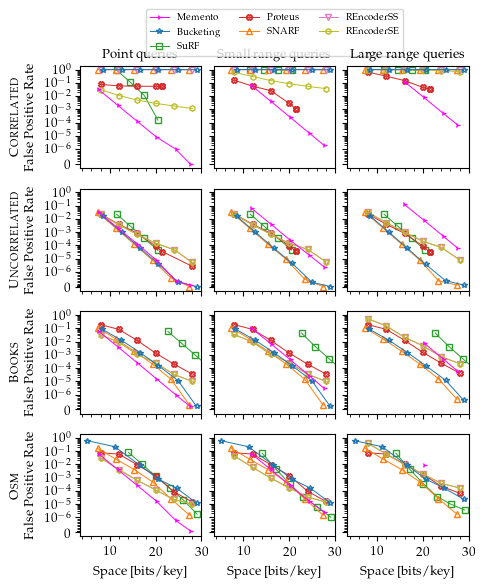

In [10]:
workloads = [('kuniform', 'qcorrelated'), ('kuniform', 'quniform'), ('books'), ('osm')]
filters_heuristics = ['memento', 'bucketing', 'surf', 'proteus', 'snarf', 'rencoder_ss', 'rencoder_se']

print_fpr_test(filters_heuristics, workloads, 'heuristics')

In [11]:
df_list = generate_tables(filters_heuristics, workloads)
with open(f'{out_folder}/table_heuristics.tex', 'w') as f:
    for df in df_list:
        f.write(df.to_latex(index=False))
        f.write("\n\n")

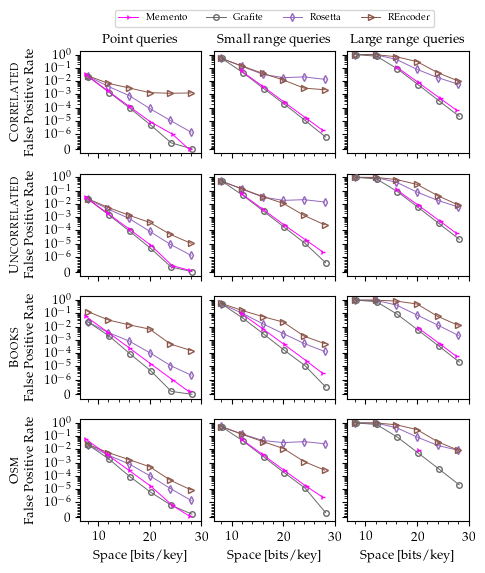

In [12]:
filters_bounded = ['memento', 'grafite', 'rosetta', 'rencoder']

print_fpr_test(filters_bounded, workloads, 'bounded')

In [13]:
df_list = generate_tables(filters_bounded, workloads)
with open(f'{out_folder}/table_bounded.tex', 'w') as f:
    for df in df_list:
        f.write(df.to_latex(index=False))
        f.write("\n\n")

## Figure 7: input size vs construction time

In [14]:
size_test_path = f'{base_csv_path}/constr_time_test'

sorted_dirs = sorted(os.listdir(size_test_path), reverse=True)
if len(sorted_dirs) < 1:
    raise FileNotFoundError(
        "error, cannot find the latest test executed")

size_test_path = Path(size_test_path + '/' + sorted_dirs[0])

keys_size = [5, 6, 7, 8]
labels_keys_size = [f'$10^{x}$' for x in keys_size]

matplotlib.rcParams['hatch.linewidth'] = 0.1

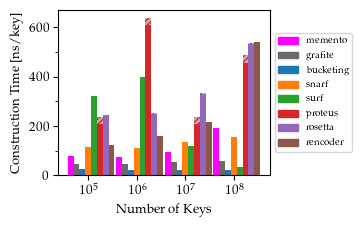

In [15]:
# Figure 7: input size vs construction time
old_range_filters = range_filters
range_filters = ['memento', 'grafite', 'bucketing', 'snarf', 'surf', 'proteus', 'rosetta', 'rencoder']

fig, ax = plt.subplots(figsize=(width_small * 0.78, 0.3 * width))

width_bars = 0.12  # the width of the bars
multiplier = 0

iterate = list(itertools.product(keys_size, range_filters))
for (r, ds) in iterate:
    i = r - min(keys_size)
    data = pd.read_csv(get_file(ds, 5, f'kuniform_{r}', query_name='quniform', path=size_test_path))
    if data.empty or data["build_time"].empty: continue

    if "modelling_time" in data.columns:
        build_time = np.mean(data['build_time'])/data['n_keys'] * 10**6
        modelling_time = np.mean(data['modelling_time'])/data['n_keys'] * 10**6
        ax.bar(range_filters.index(ds) * width_bars + i, build_time, width_bars, color=range_filters_style_kwargs[ds]['color'])
        ax.bar(range_filters.index(ds) * width_bars + i, modelling_time, width_bars, label='_nolegend_', bottom=build_time, color=range_filters_style_kwargs[ds]['color'], alpha=0.1, hatch='//////')
    else:
        build_time = np.mean(data['build_time'])/data['n_keys'] * 10**6
        ax.bar(range_filters.index(ds) * width_bars + i, build_time, width_bars, color=range_filters_style_kwargs[ds]['color'])

ax.set_ylabel('Construction Time [ns/key]', fontsize=ylabel_font_size)
ax.legend(range_filters, loc='center left', bbox_to_anchor=(1, 0.5),
                  fancybox=True, shadow=False, ncol=1, fontsize=legend_font_size)
ax.set_xticks(np.arange(len(keys_size)) + 3 * width_bars, labels_keys_size)
ax.set_xlabel('Number of Keys', fontsize=xlabel_font_size)
ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(100))
leg = ax.get_legend()
for ds in range_filters:
    leg.legend_handles[range_filters.index(ds)].set_color(range_filters_style_kwargs[ds]['color'])


fig.savefig(f'{out_folder}/constr_time_test.pdf', bbox_inches='tight', pad_inches=0.01)
range_filters = old_range_filters

## Figure 6: bpk vs query time (true queries)

In [16]:
true_test_path = f'{base_csv_path}/true_test'

sorted_dirs = sorted(os.listdir(true_test_path), reverse=True)
if len(sorted_dirs) < 1:
    raise FileNotFoundError(
        "error, cannot find the latest test executed")

true_test_path = Path(true_test_path + '/' + sorted_dirs[0])

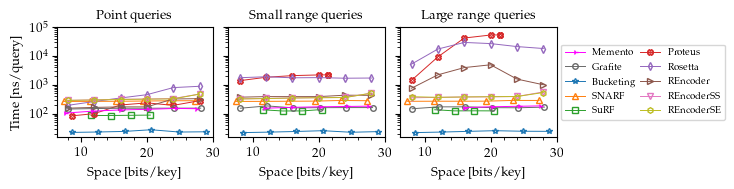

In [21]:
# Figure 6: bpk vs query time (true queries)

keys_synth = ['kuniform']
nrows = len(keys_synth)
ncols = len(query_range)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey='row', figsize=(width * 0.9, 0.2 * width))

iterate = list(itertools.product(range_filters, enumerate(query_range)))

for (ds, r) in iterate:
    (idx, ran) = r
    data = pd.read_csv(get_file(ds, r[1], 'kuniform', 'qtrue', true_test_path))
    data["single_query_time"] = (data["query_time"] / data["n_queries"]) * 10**6
    data.plot("bpk", "single_query_time", ax=axes[idx], **range_filters_style_kwargs[ds], **lines_style)

ticks = [10**2, 10**3, 10**4, 10**5]

for ax in axes.flatten():
    ax.set_xlim(right=max_x_axis_bpk)
    ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(2))
    ax.set_xlabel('Space [bits/key]', fontsize=xlabel_font_size)
    ax.set_yscale('log')
    ax.get_legend().remove()
    ax.yaxis.set_minor_locator(matplotlib.ticker.LogLocator(numticks=10, subs='auto'))
    ax.set_yticks(ticks)

for i, k in list(enumerate(keys_synth)):
    axis_title = f'{k}'
    axes[i].set_ylabel("Time [ns/query]", fontsize=ylabel_font_size)
    
for i, _ in list(enumerate(query_range)):
    axes[i].set_title(query_range_label[i], fontsize=title_font_size)
    
fig.subplots_adjust(wspace=0.1)
fig.savefig(f'{out_folder}/true_queries_test_nolegend.pdf', bbox_inches='tight', pad_inches=0.01)
box = axes[2].get_position()
lines, labels = axes[0].get_legend_handles_labels()
# order = [0,1,5,2,6,3,7,4,8]
axes[2].legend(lines, labels, 
                  loc='center left', bbox_to_anchor=(1, 0.5),
                  fancybox=True, shadow=False, ncol=2, fontsize=legend_font_size, columnspacing=0.5)

fig.savefig(f'{out_folder}/true_queries_test.pdf', bbox_inches='tight', pad_inches=0.01)

## Figure 3: Correlation

In [22]:
corr_test_path = f'{base_csv_path}/corr_test'

sorted_dirs = sorted(os.listdir(corr_test_path), reverse=True)
if len(sorted_dirs) < 1:
    raise FileNotFoundError(
        "error, cannot find the latest test executed")

corr_test_path = Path(corr_test_path + '/' + sorted_dirs[0])

corr_degrees = range(0, 11)

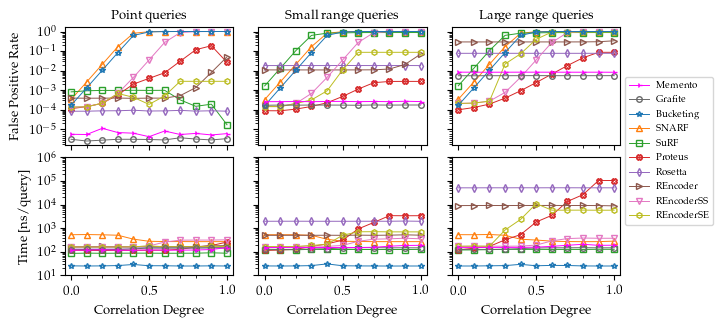

In [23]:
# Figure 3: Correlation
fig, axes = plt.subplots(2, 3, sharex=True, sharey='row', figsize=(width, 0.45 * width))

range_filters_corr = ['memento', 'grafite', 'bucketing', 'snarf', 'surf', 'proteus', 'rosetta', 'rencoder', 'rencoder_ss', 'rencoder_se']

iterate = list(itertools.product(range_filters_corr, enumerate(query_range), corr_degrees))

values = [dict() for x in range(len(query_range))]
time_values = [dict() for x in range(len(query_range))]

for ds in range_filters_corr:
    for r in range(len(query_range)):
        values[r][ds] = []
        time_values[r][ds] = []
        
xlabels_corr = [ x/10 for x in corr_degrees ]

for (ds, r, deg) in iterate:
    (idx, ran) = r
    data = pd.read_csv(get_file(ds, r[1], f'kuniform_{deg}', 'qcorrelated', corr_test_path))
    data['fpr_opt'] = data['false_positives'] / data['n_queries']
    fpr = data['fpr_opt'][0]
    time = data['query_time'][0]/data['n_queries'][0] * 10**6
    values[idx][ds].append(fpr)
    time_values[idx][ds].append(time)
    
for r in range(len(query_range)):
    for key, data_list in values[r].items():
        axes[0][r].plot(xlabels_corr, data_list, **range_filters_style_kwargs[key], **lines_style)
            
for r in range(len(query_range)):
    for key, data_list in time_values[r].items():
        axes[1][r].plot(xlabels_corr, data_list, **range_filters_style_kwargs[key], **lines_style)   
    axes[1][r].set_ylim(10**1, 10**6)
    axes[1][r].set_yscale('log')
    
axes[1][0].set_ylabel('Time [ns/query]', fontsize=ylabel_font_size)

for ax in axes.flatten():
    ax.margins(0.04)
    ax.set_yscale('symlog', linthresh=(1e-05))
    ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(0.1))
    
for ax in axes[1].flatten():
    ax.set_xlabel('Correlation Degree', fontsize=xlabel_font_size)
    ax.yaxis.set_minor_locator(matplotlib.ticker.LogLocator(numticks=10, subs='auto'))
    
for i, _ in list(enumerate(query_range)):
    axes[0][i].set_title(query_range_label[i], fontsize=xlabel_font_size)
plt.subplots_adjust(hspace=0.1, wspace=0.15)
axes[0][0].set_ylabel('False Positive Rate', fontsize=ylabel_font_size)
axes[0][0].yaxis.set_minor_locator(matplotlib.ticker.LogLocator(numticks=10, subs='auto'))

plt.savefig(f'{out_folder}/corr_test_twolines_nolegend.pdf', bbox_inches='tight', pad_inches=0.01)
box = axes[0][2].get_position()
lines, labels = axes[0][0].get_legend_handles_labels()
# order = [0,4,1,5,2,6,3,4]
order = list(range(len(range_filters_corr)))
axes[0][2].legend([lines[idx] for idx in order],[labels[idx] for idx in order], 
                  loc='center left', bbox_to_anchor=(1, -0.05),
                  fancybox=True, shadow=False, ncol=1, fontsize=legend_font_size)

plt.savefig(f'{out_folder}/corr_test_twolines.pdf', bbox_inches='tight', pad_inches=0.01)

## Figure 1: Correlation (small)

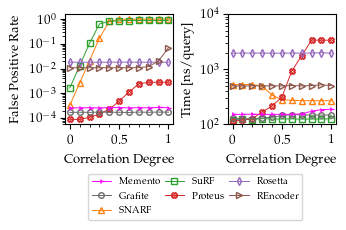

In [24]:
# Figure 1: Correlation (small)
range_filters_corr = ['memento', 'grafite', 'snarf', 'surf', 'proteus', 'rosetta', 'rencoder']


fig, axes = plt.subplots(1, 2, sharex=True, figsize=(width_small, 0.2 * width))
query_range_small = [5]

iterate = list(itertools.product(range_filters_corr, enumerate(query_range_small), corr_degrees))
values = [dict() for x in range(len(query_range_small))]
time_values = [dict() for x in range(len(query_range_small))]

for ds in range_filters_corr:
    for r in range(len(query_range_small)):
        values[r][ds] = []
        time_values[r][ds] = []
        
xlabels_corr = [ x/10 for x in corr_degrees ]

for (ds, r, deg) in iterate:
    (idx, ran) = r
    data = pd.read_csv(get_file(ds, r[1], f'kuniform_{deg}', 'qcorrelated', corr_test_path))
    data['fpr_opt'] = data['false_positives'] / data['n_queries']
    fpr = data['fpr'][0]
    time = data['query_time'][0]/data['n_queries'][0] * 10**6
    values[idx][ds].append(fpr)
    time_values[idx][ds].append(time)
    
for key, data_list in values[0].items():
    axes[0].plot(xlabels_corr, data_list, **range_filters_style_kwargs[key], **lines_style)
            
for key, data_list in time_values[0].items():
    axes[1].plot(xlabels_corr, data_list, **range_filters_style_kwargs[key], **lines_style)   
axes[1].set_yscale('log')

axes[1].set_ylabel('Time [ns/query]', fontsize=ylabel_font_size)
axes[1].set_ylim(10**2, 10**4)

for ax in axes.flatten():
    ax.set_yscale('log')
    ax.set_xlabel('Correlation Degree', fontsize=xlabel_font_size)
    ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(0.1))
    ax.set_xticks([0, 0.5, 1])

box = axes[1].get_position()
lines, labels = axes[0].get_legend_handles_labels()
lines2, labels2 = axes[1].get_legend_handles_labels()
axes[1].xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%g'))
axes[1].legend(lines, labels, loc='upper center', bbox_to_anchor=(-0.3, -0.4),
          fancybox=True, shadow=False, ncol=3, columnspacing=0.5, fontsize=legend_font_size)
axes[0].set_ylabel('False Positive Rate', fontsize=ylabel_font_size)
axes[0].yaxis.set_minor_locator(matplotlib.ticker.LogLocator(numticks=10, subs='auto'))
axes[0].set_yticks([1, 1e-01, 1e-02, 1e-03, 1e-04])
fig.align_ylabels([axes[0], axes[1]])

plt.subplots_adjust(wspace=0.5)
plt.savefig(f'{out_folder}/corr_test_small.pdf', bbox_inches='tight', pad_inches=0.01)